## Importing Libraries

In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV    
from sklearn.preprocessing import scale    
from sklearn.decomposition import PCA      
from imblearn.over_sampling import SMOTE  
from sklearn.feature_selection import RFE   
import random
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score, accuracy_score, precision_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


## Loading Data

In [199]:
# Adjusting unknowns as missing values 'nan' source: https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
missing_values = ["unknown"]
train = pd.read_csv('C:/Users/anakib/OneDrive - IESEG/Desktop/MBD/Statistical machine learning for marketing/SML ind assignment/bank_mkt_train.csv', na_values = missing_values)

## 1- Data Exploration & Preprocessing

In [200]:
train.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,...,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45.0,services,married,high.school,no,yes,no,cellular,apr,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45.0,NaN,married,NaN,NaN,NaN,NaN,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [201]:
train['age_group'] = train['age'] // 17

In [202]:
# Creating age groups
train.groupby(['age_group', 'marital'])['client_id'].agg('count')

age_group  marital 
1.0        divorced     324
           married     2472
           single      3324
2.0        divorced    1255
           married     6723
           single      2014
3.0        divorced     584
           married     2441
           single       169
4.0        divorced      57
           married      159
           single         9
5.0        divorced      14
           married       15
           single         1
Name: client_id, dtype: int64

In [203]:
# null and unknown values
train.isnull().sum()

client_id            0
age                202
job                305
marital            238
education          948
default           4323
housing            644
loan               670
contact            217
month              199
day_of_week        185
campaign           203
pdays              185
previous           209
poutcome           175
emp.var.rate       165
cons.price.idx     181
cons.conf.idx      197
euribor3m          204
nr.employed        184
subscribe            0
age_group          202
dtype: int64

In [204]:
# Checking total NAs
train.isnull().values.sum().sum()

9836

In [205]:
# Checking total observations
train.count().sum()

430164

In [206]:
# 2.2 % of data are nulls so we can safely remove them as per https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
(9836/430164) * 100 

2.286569773388754

In [207]:
# Dropping NAs
train = train.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

In [208]:
# Checking for NAs
train.isnull().values.sum().sum()

0

In [209]:
# another look at our data
train.groupby(['age_group', 'marital'])['client_id'].agg('count')

age_group  marital 
1.0        divorced     243
           married     1724
           single      2461
2.0        divorced     816
           married     3971
           single      1263
3.0        divorced     344
           married     1271
           single        88
4.0        divorced      40
           married      125
           single         8
5.0        divorced       6
           married       10
Name: client_id, dtype: int64

In [210]:
# getting all the categorical columns: ref https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
categorical = train.select_dtypes(exclude=["number"])

In [211]:
categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,management,married,basic.9y,no,no,no,cellular,jul,thu,nonexistent
1,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,nonexistent
2,technician,married,basic.9y,no,yes,yes,cellular,may,mon,nonexistent
3,services,married,high.school,no,yes,no,cellular,apr,tue,nonexistent
5,technician,married,professional.course,no,no,no,telephone,may,wed,nonexistent
...,...,...,...,...,...,...,...,...,...,...
19994,blue-collar,single,high.school,no,yes,no,cellular,jul,thu,nonexistent
19996,admin.,single,university.degree,no,yes,no,cellular,may,mon,failure
19997,admin.,married,high.school,no,yes,yes,cellular,may,mon,failure
19998,admin.,married,high.school,no,yes,no,telephone,jul,mon,nonexistent


C:\tools\Anaconda3\envs\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of subscriptions')

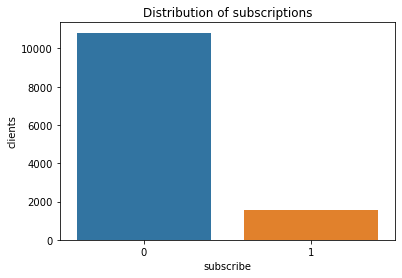

In [212]:
my_target = train[['client_id','subscribe']].groupby('subscribe').count()
my_target.reset_index(inplace=True,drop=False)
my_target.columns= ['subscribe','clients']

sns.barplot('subscribe','clients',data=my_target).set_title("Distribution of subscriptions")

In [213]:
# we have an uneven distribution 

## Scaling Data

In [214]:
# get all numeric columns
numbs = train.select_dtypes(include=np.number).columns.tolist()

In [215]:
numbs

['client_id',
 'age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'subscribe',
 'age_group']

In [216]:
# cloning DF
train2 = train.copy()

# https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
# scaling
scaler = StandardScaler()
train2[numbs] = scaler.fit_transform(train2[numbs])

## Encoding Categorical Values

In [217]:
# this is creating Nas (dummies alternative) ----------

# cats = list(categorical)
# cats
# encoder = OneHotEncoder(sparse=False)

# Encode Categoricals
# cats_enc = pd.DataFrame(encoder.fit_transform(train2[cats]))
# cats_enc.columns = encoder.get_feature_names(cats)
# This is creating Nas
# use new encoded instead of categoricals
# train2 = train2.drop(cats ,axis=1)
# train2 = pd.concat([cats_enc, train2], axis=1)

# no need to encode our target var as it is already binary

In [250]:
train2 = pd.get_dummies(train2, drop_first=True)

In [251]:
train2.isna().sum().sum()

0

In [252]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12370 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   client_id                      12370 non-null  int32
 1   age                            12370 non-null  int32
 2   campaign                       12370 non-null  int32
 3   pdays                          12370 non-null  int32
 4   previous                       12370 non-null  int32
 5   emp.var.rate                   12370 non-null  int32
 6   cons.price.idx                 12370 non-null  int32
 7   cons.conf.idx                  12370 non-null  int32
 8   euribor3m                      12370 non-null  int32
 9   nr.employed                    12370 non-null  int32
 10  subscribe                      12370 non-null  int32
 11  age_group                      12370 non-null  int32
 12  job_blue-collar                12370 non-null  int32
 13  job_entrepreneur

In [253]:
# Splitting our dataset into train and test

feature = train2.drop('subscribe', axis=1)
target = train2['subscribe']


X_train, X_test, y_train, y_test = train_test_split(feature , target, shuffle = True, test_size=0.2, random_state=1)



In [254]:
X_train.count().sum()

475008

In [255]:
X_train.isna().sum().sum()

0

In [256]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [257]:
X_train.head()

,client_id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
12047,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13654,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6852,-1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
5895,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16690,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [258]:
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)

# Fitting

## Decision Tree

In [260]:
# Implementing Decision Tree
from sklearn import tree 


In [261]:
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
eval_dec_tree = evaluate_model(dtc, X_test, y_test)
eval_dec_tree

## Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [306]:
# Evaluation
eval_randomfor = evaluate_model(rf, X_test, y_test)

eval_randomfor

{'acc': 0.8908649959579629,
 'prec': 0.5833333333333334,
 'rec': 0.2636986301369863,
 'f1': 0.3632075471698114,
 'kappa': 0.3126985825527221,
 'fpr': array([0.00000000e+00, 0.00000000e+00, 4.58295142e-04, 9.16590284e-04,
        1.37488543e-03, 1.37488543e-03, 1.83318057e-03, 1.83318057e-03,
        2.29147571e-03, 2.74977085e-03, 3.20806599e-03, 3.20806599e-03,
        3.66636114e-03, 3.66636114e-03, 4.12465628e-03, 4.12465628e-03,
        4.12465628e-03, 4.12465628e-03, 5.04124656e-03, 5.49954170e-03,
        6.41613199e-03, 6.87442713e-03, 6.87442713e-03, 8.70760770e-03,
        9.62419798e-03, 1.05407883e-02, 1.23739688e-02, 1.28322640e-02,
        1.37488543e-02, 1.42071494e-02, 1.60403300e-02, 1.78735105e-02,
        1.92483960e-02, 2.06232814e-02, 2.24564620e-02, 2.33730522e-02,
        2.47479377e-02, 2.52062328e-02, 2.56645280e-02, 2.79560037e-02,
        3.20806599e-02, 3.48304308e-02, 3.80384968e-02, 4.03299725e-02,
        4.30797434e-02, 4.53712191e-02, 4.72043996e-02, 4.9

## KNN

In [307]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [308]:
# Evaluation
eval_knn = evaluate_model(knn, X_test, y_test)

eval_knn

{'acc': 0.881568310428456,
 'prec': 0.4954128440366973,
 'rec': 0.18493150684931506,
 'f1': 0.26932668329177056,
 'kappa': 0.2192288387342769,
 'fpr': array([0.        , 0.00183318, 0.01054079, 0.02520623, 0.09486709,
        0.3675527 , 1.        ]),
 'tpr': array([0.        , 0.01369863, 0.10273973, 0.18493151, 0.32534247,
        0.56849315, 1.        ]),
 'auc': 0.6382646623055385,
 'cm': array([[2127,   55],
        [ 238,   54]], dtype=int64)}

## Logistic Regression

In [309]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [310]:
# Evaluation
lr_eval = evaluate_model(lr, X_test, y_test)

# output is huge so printing each element 
print('Acc:', lr_eval['acc'])
print('Prec:', lr_eval['prec'])
print('Rec', lr_eval['rec'])
print('F1:', lr_eval['f1'])

Acc: 0.8916734033953112
Prec: 0.6463414634146342
Rec 0.1815068493150685
F1: 0.28342245989304815


## Gradient Boosting

In [312]:
gb = GradientBoostingClassifier()
gb.fit(X_test,y_test)

GradientBoostingClassifier()

In [315]:
# Evaluation
gb_eval = evaluate_model(lr, X_test, y_test)
gb_eval

print('Acc:', lr_eval['acc'])
print('Prec:', lr_eval['prec'])
print('Rec', lr_eval['rec'])
print('F1:', lr_eval['f1'])

Acc: 0.8916734033953112
Prec: 0.6463414634146342
Rec 0.1815068493150685
F1: 0.28342245989304815


## Grid Search, Tuning & cross validation

In [ ]:
# Loogistic Regression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [316]:
# Random forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

rf_grids = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# fitting and getting optimals
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [325]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

